In [33]:
from __future__ import print_function
import numpy as np
import pylab as pl
from scipy.optimize import curve_fit, minimize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
np.random.seed(999999)

In [35]:
mymean = 100

In [36]:
md = {}
md['chisq'] = np.random.chisquare(mymean, 1000)

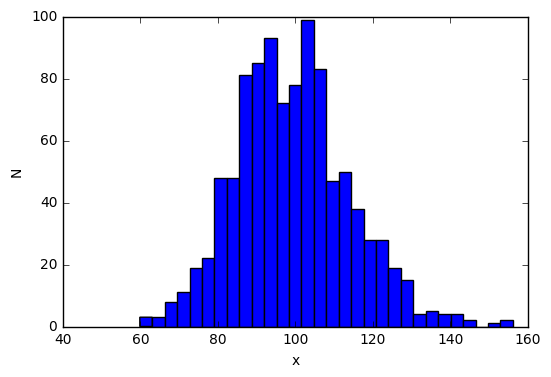

In [37]:
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [38]:
mysize = (2000 / np.array(range(1,101))).astype(int)

In [39]:
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


In [40]:
md['chisq'] = {}
for i in mysize:
    md['chisq'][i] = np.random.chisquare(mymean, size = i)

print (md['chisq'])

{133: array([ 101.01270788,   96.52633742,   96.6352067 ,   90.36752687,
         96.51281356,   75.41745173,   99.33765401,  109.25320993,
         93.57912158,   97.34127781,   86.28769422,   94.93811935,
        135.77060916,   82.492287  ,   95.30022358,   96.89460577,
         82.92553267,  101.76030191,   93.58017317,  106.53900332,
        104.92166461,  124.65669549,   93.29230429,   84.79018698,
        115.28372593,  110.763333  ,  141.52172419,  104.28791436,
        107.93241802,  112.76735765,   90.54482432,   77.81686356,
         86.27110255,  108.3090713 ,  119.28948976,   89.37792066,
        112.16686642,   92.14997227,  115.36241993,  107.11409293,
         95.84794918,  106.5395294 ,   92.88768501,   81.10014124,
         96.89163267,  109.52446429,   79.12279863,   79.53463317,
        107.06657364,  104.76551101,  119.22051549,  127.73625522,
         93.72377607,   98.73414182,   95.44885563,  121.29373297,
         96.3176561 ,   94.17350575,   88.71404286,  113

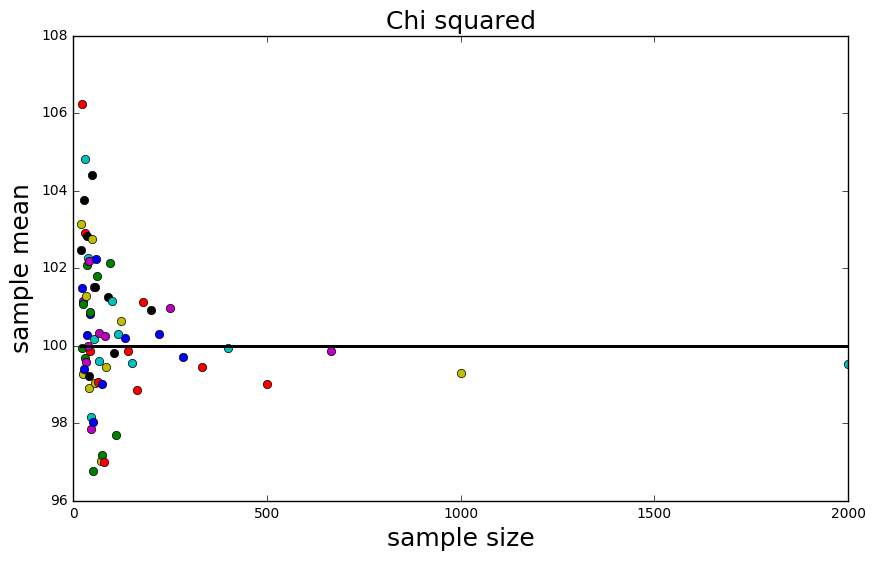

In [41]:
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for ii in md['chisq']:
    if not type(ii) == str:
        md['chisq']['means'][ii] = md['chisq'][ii].mean()
        axchisq_mu_n.plot(ii, md['chisq']['means'][ii], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')        

# The chi square means are approximately normally distributed, but appear skew less than 100.

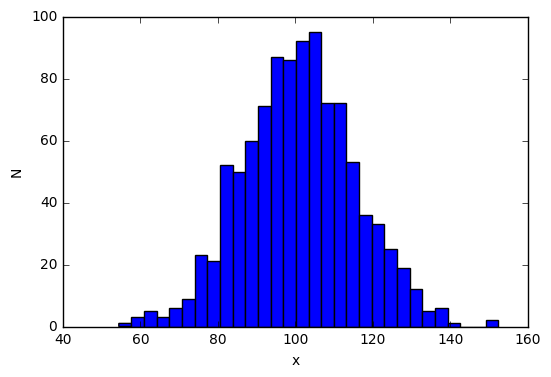

In [42]:
sd = 15
md['norm'] = np.random.normal(mymean, sd, 1000)

pl.hist(md['norm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

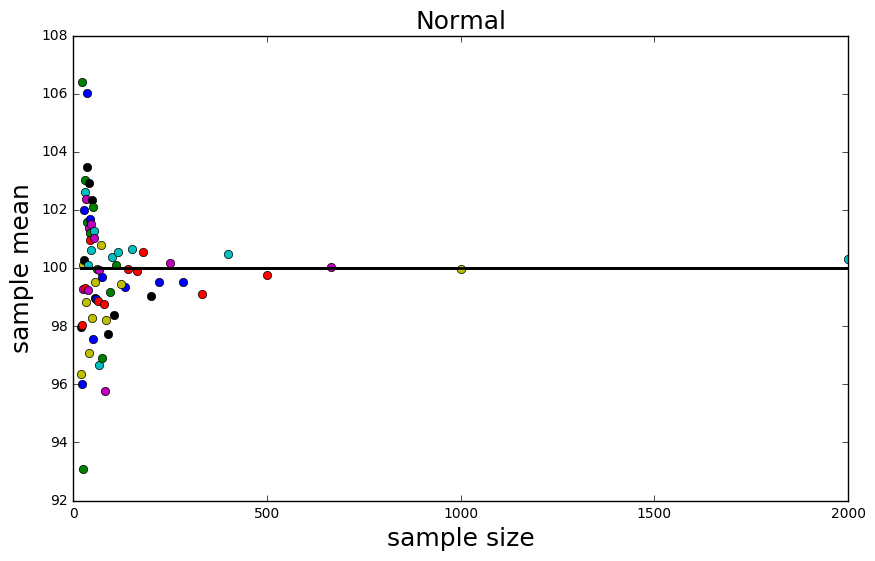

In [43]:
md['norm'] = {}
for n in mysize:
    md['norm'][n] = np.random.normal(mymean, sd, size = n)

md['norm']['means'] = {}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        axnorm_mu_n.plot(nn, md['norm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

# The normal means are approximately normally distributed with a meadian of 100

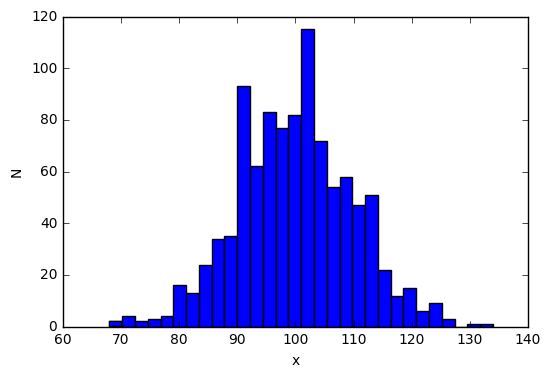

In [44]:
md['pois'] = np.random.poisson(mymean, 1000)
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

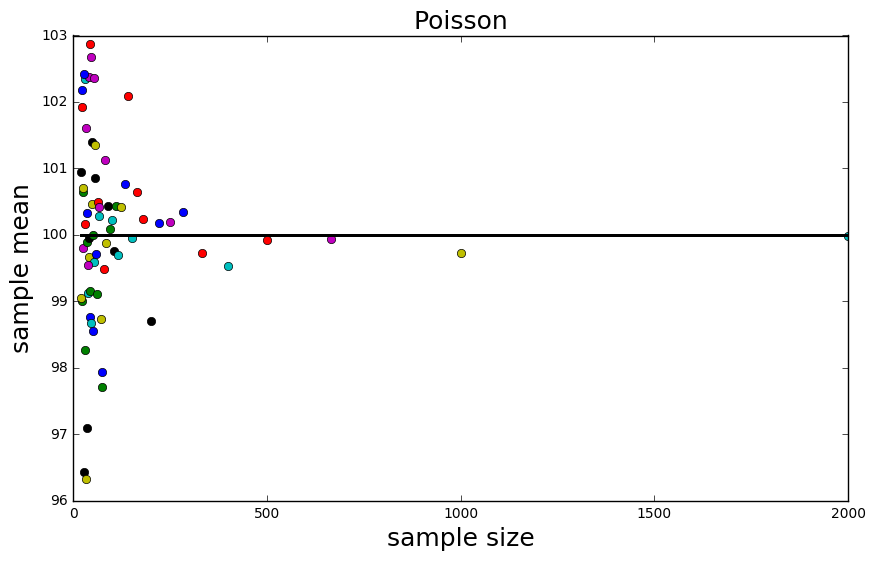

In [45]:
md['pois'] = {}
for x in mysize:
    md['pois'][x] = np.random.poisson(mymean, size = x)

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for xx in md['pois']:
    if not type(xx) == str:
        md['pois']['means'][xx] = md['pois'][xx].mean()
        axpois_mu_n.plot(xx, md['pois']['means'][xx], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

# The poisson means are approximately normally distributed, but appear skew less than 100.

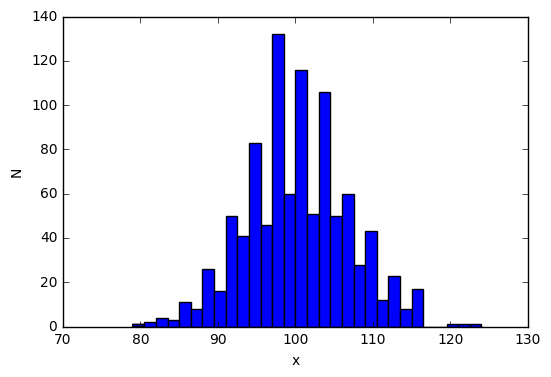

In [46]:
md['binom'] = np.random.binomial(200, 0.5, 1000)
pl.hist(md['binom'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

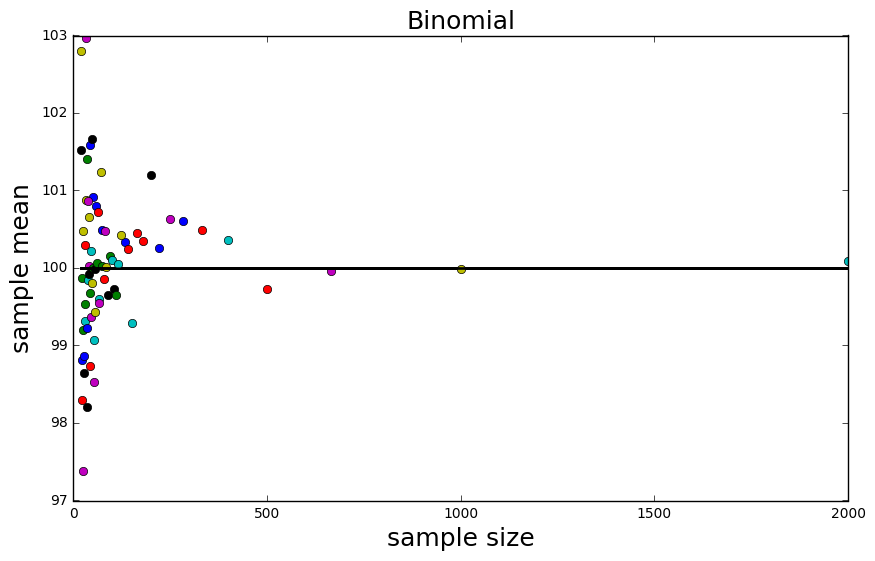

In [47]:
md['binom'] = {}
for y in mysize:
    md['binom'][y] = np.random.binomial(200, 0.5, size = y)

md['binom']['means'] = {}
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for yy in md['binom']:
    if not type(yy) == str:
        md['binom']['means'][yy] = md['binom'][yy].mean()
        axbinom_mu_n.plot(yy, md['binom']['means'][yy], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinom_mu_n.set_title('Binomial', fontsize=18)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

# The binomial means are approximately normally distributed.

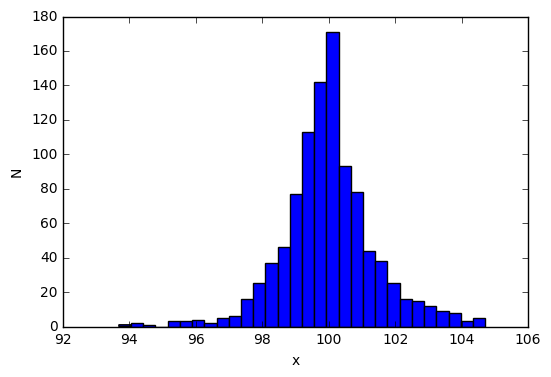

In [48]:
md['laplace'] = np.random.laplace(mymean, 1, 1000)
pl.hist(md['laplace'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

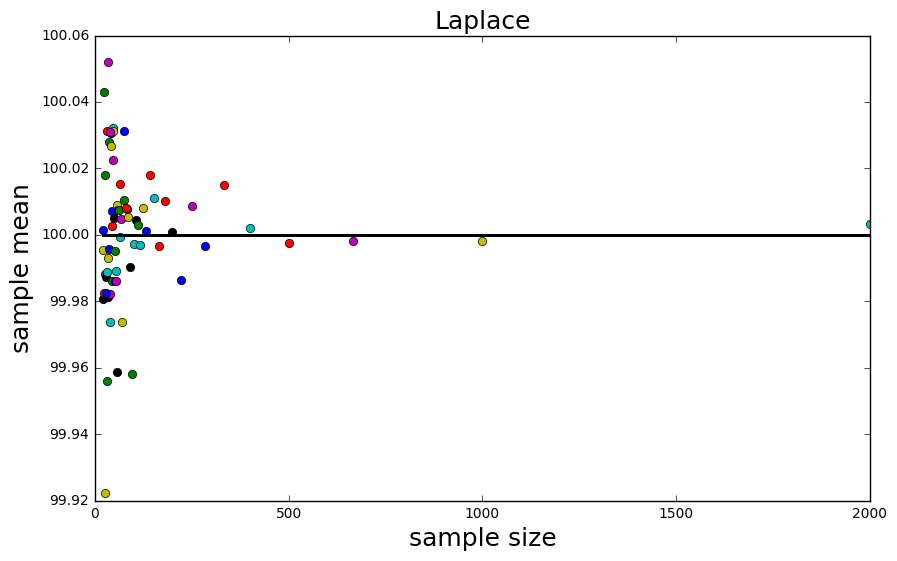

In [49]:
md['laplace'] = {}
for z in mysize:
    md['laplace'][z] = np.random.laplace(mymean, 0.1, size = z)

md['laplace']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for zz in md['laplace']:
    if not type(zz) == str:
        md['laplace']['means'][zz] = md['laplace'][zz].mean()
        axlnorm_mu_n.plot(zz, md['laplace']['means'][zz], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Laplace', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

# The laplace means are approximately normally distributed.

In [50]:
allmeans = md['chisq']['means'].values(), md['norm']['means'].values(), md['pois']['means'].values(), md['binom']['means'].values(), md['laplace']['means'].values()

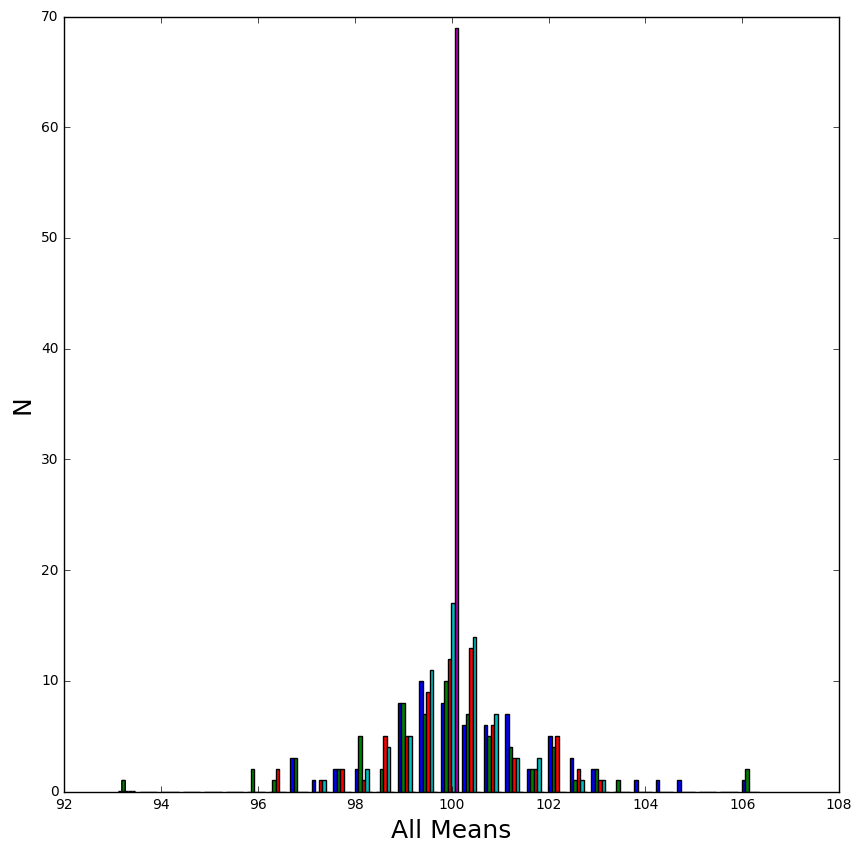

In [51]:
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('All Means', fontsize = 18)
pl.ylabel('N', fontsize = 18)

The central limit theorem state that the arithmetic mean of a sufficiently large number of iterates of independent random variables will be approximately normally distributed, regardless of the underlying distribution. In this assignment, developed 100 mean values from each of five different distributions. As demonstrated in the resulting histogram, the central limit theorem holds and the values are approximately normally distributed.